**PREDICTION FO ADMISSSION RATE OF STUDENTS BASED ON DIFFERENTE FEATURES OF THEIR ACADEMIC LIFE**

## Graduate Admission Probability Model

This code predicts a student’s likelihood of being admitted to a university based on seven features:

1. **GRE score**  
2. **TOEFL score**  
3. **University rating**  
4. **Statement of purpose (SOP) strength**  
5. **Letter of recommendation (LOR) strength**  
6. **Undergraduate GPA (UGPA)**  
7. **Research experience** (0 = no, 1 = yes)

### Purpose
The model generalizes insights from the *Graduate Admissions 2* dataset by **Mohan S. Acharya** to help prospective students estimate their admission chances, save application fees, and make better‐informed decisions about their graduate studies.

### Dataset
- **Source:** <https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv>  
- **Split:** 70 % training &nbsp;|&nbsp; 30 % validation

### Output
After training, the model classifies your admission prospects as:

- **High**
- **Medium**
- **Low**

## Model

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importación de librerías
import numpy as np
import keras
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# !Additional Needed Libraries
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping

# !pip install livelossplot
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Carga de datos de archivo.cvs
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data = data.reset_index()
data = data.drop('Serial No.', axis=1)

data.head()

,index,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,337,118,4,4.5,4.5,9.65,1,0.92
1,1,324,107,4,4.0,4.5,8.87,1,0.76
2,2,316,104,3,3.0,3.5,8.00,1,0.72
3,3,322,110,3,3.5,2.5,8.67,1,0.80
4,4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
# Data transformation
data.columns = data.columns.str.strip().str.replace(' ','_')
print(data.columns.tolist())

['index', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_Admit']


In [22]:
# Predicters variable definition
x = data.drop('Chance_of_Admit', axis=1)
# Predicted variable definition
Y = data[data.columns[-1]]

In [24]:
# Train and test split
X_train, X_test, Y_train, Y_test=train_test_split(x,Y, test_size=0.2 , random_state=47)

In [26]:
# Normalization of predicters variables
from sklearn.preprocessing import StandardScaler

#Definition of StandardScaler function
scaler = StandardScaler()
scaler.fit(x)

#Transformation of the train and test set
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [28]:
# Definition of the output variables, interest variables
output_var = 1

In [30]:
#Definition of the input dimensions, predicters variables
dims = X_train.shape[1]
print(dims, 'input_variables')

8 input_variables


## One-Layer Neural Network

In [32]:
# Cell 1
# Cleaning of the previous models memory
K.clear_session()

# One-layer neural network
model_p1 = Sequential(name='One_layer_neural_network')
model_p1.add(Dense(1, input_shape=(dims,), activation='linear', name='Output_layer'))

# Compilation
model_p1.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mae'])

# Model Summary
print('Model Summary')
model_p1.summary()

# Model trainning
epochs_p1 = 50 # epochs
history_p1 = model_p1.fit(X_train, Y_train, epochs=epochs_p1, validation_data=(X_test, Y_test), verbose=0)


Model Summary


Model: "One_layer_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Neural Network Performance Graphs


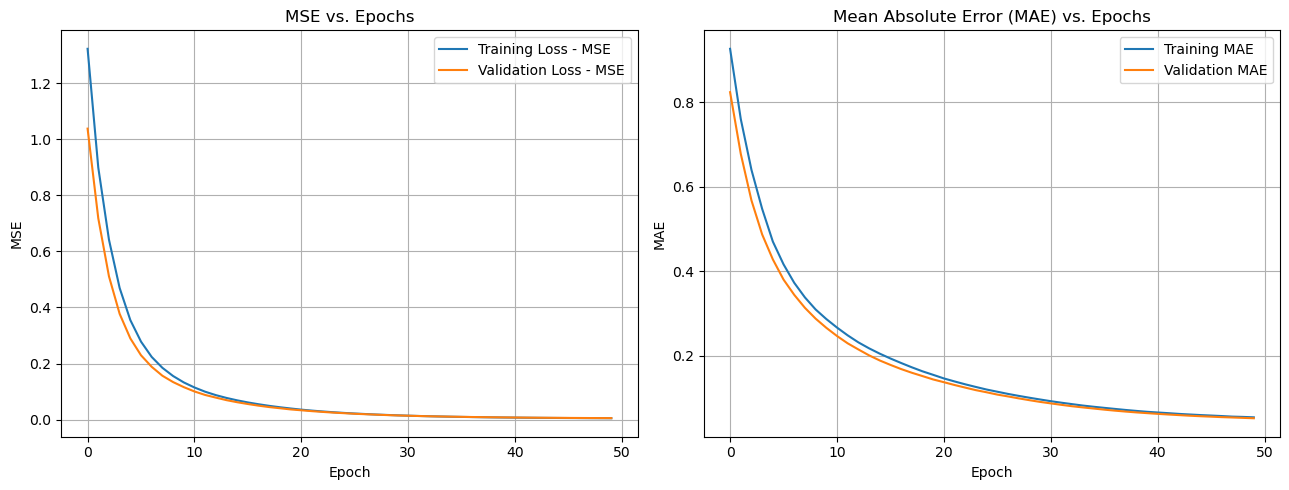

Model Summary
Test MSE: 0.0053
Test MAE: 0.0522


In [33]:
# Model performance summary
print("Neural Network Performance Graphs")

# MSE Plot
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(history_p1.history['loss'], label='Training Loss - MSE')
plt.plot(history_p1.history['val_loss'], label='Validation Loss - MSE')
plt.title('MSE vs. Epochs')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')   
plt.grid(True)

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history_p1.history['mae'], label='Training MAE')
plt.plot(history_p1.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE) vs. Epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Final linked data
print("Model Summary")
loss_test_p1, mae_test_p1 = model_p1.evaluate(X_test, Y_test, verbose=0)
mse_test_p1 = loss_test_p1

print(f"Test MSE: {mse_test_p1:.4f}")
print(f"Test MAE: {mae_test_p1:.4f}")

## Multilayer Neural Network

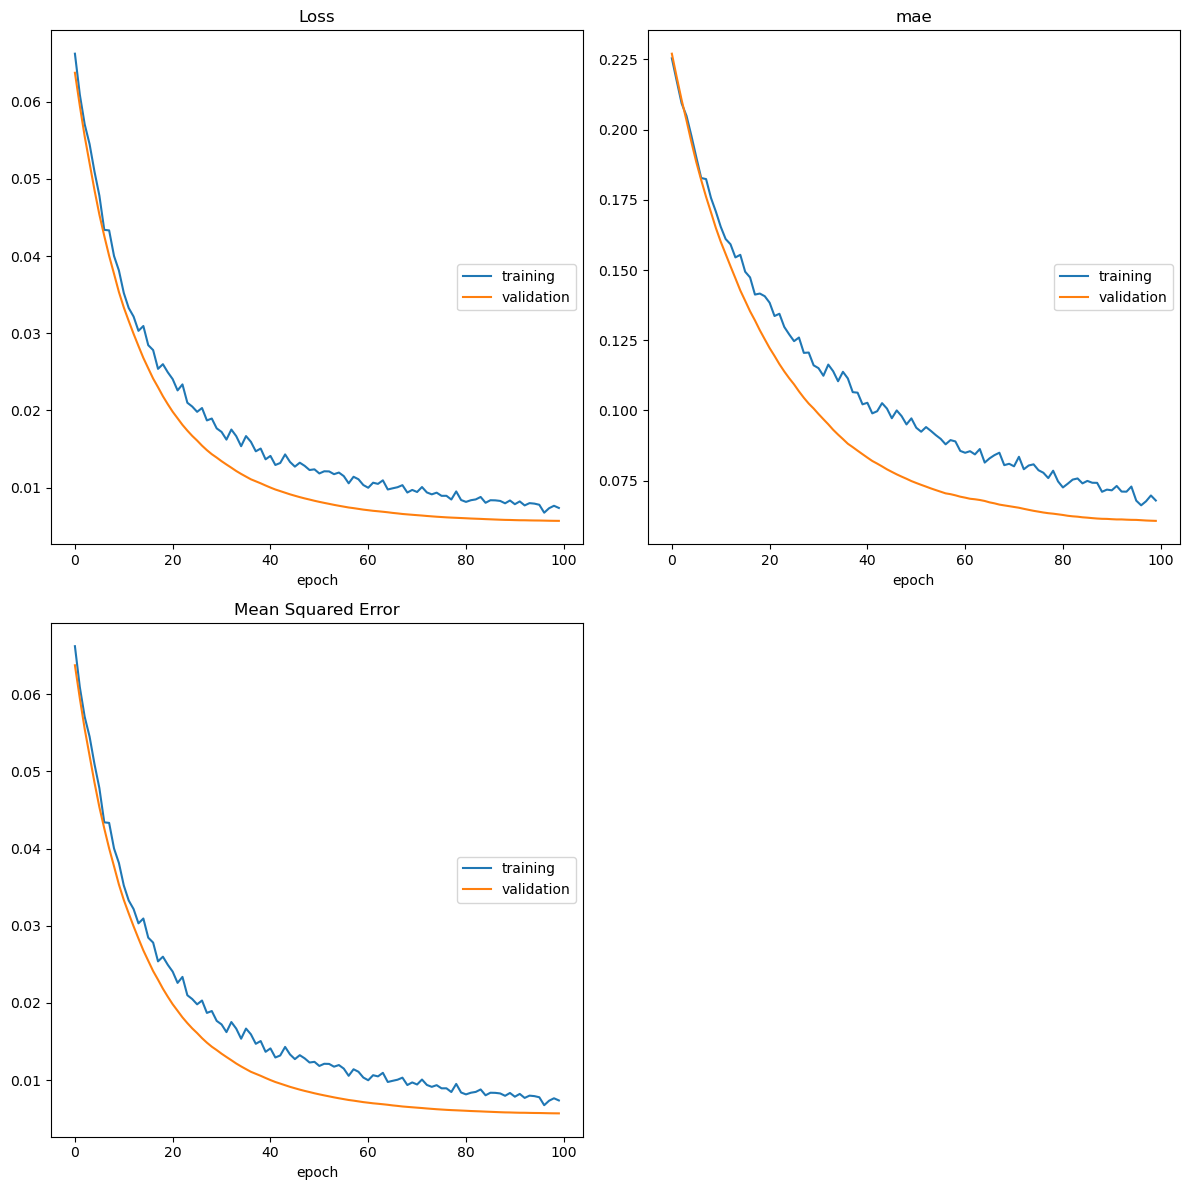

Loss
	training         	 (min:    0.007, max:    0.066, cur:    0.007)
	validation       	 (min:    0.006, max:    0.064, cur:    0.006)
mae
	training         	 (min:    0.066, max:    0.225, cur:    0.068)
	validation       	 (min:    0.061, max:    0.227, cur:    0.061)
Mean Squared Error
	training         	 (min:    0.007, max:    0.066, cur:    0.007)
	validation       	 (min:    0.006, max:    0.064, cur:    0.006)
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0070 - mae: 0.0656 - mse: 0.0070 - val_loss: 0.0057 - val_mae: 0.0607 - val_mse: 0.0057


In [40]:
# Cell 2

# Clean previous sessions
K.clear_session()

# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=47)

# Model arquitecture definition
model_p2 = Sequential()
model_p2.add(Dense(256, input_shape=(dims,), activation='relu'))
model_p2.add(Dropout(0.2))
model_p2.add(Dense(256, activation='relu'))
model_p2.add(Dropout(0.2))
model_p2.add(Dense(256, activation='relu'))
model_p2.add(Dropout(0.2))
model_p2.add(Dense(output_var))
model_p2.add(Dense(1, activation='sigmoid'))

# Neuronal Network arquitecture print
print(model_p2.summary())

# Compilation
model_p2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

# Epochs
epochs_p2 = 100

# Early Stop
early_stop = EarlyStopping(monitor='val_loss',patience=7, restore_best_weights=True)

# model trainning
history = model_p2.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=epochs_p2, callbacks=[PlotLossesKeras(), early_stop])

In [44]:
# Perfomance Evaluation of test set
y_pred = model_p2.predict(X_test)
mae_m2 = mean_absolute_error(Y_test, y_pred)
mse_m2 = mean_squared_error(Y_test, y_pred)

print(f"MAE en test: {mae_m2:.4f}")
print(f"MSE en test: {mse_m2:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
MAE en test: 0.0607
MSE en test: 0.0057


## Results Comparison

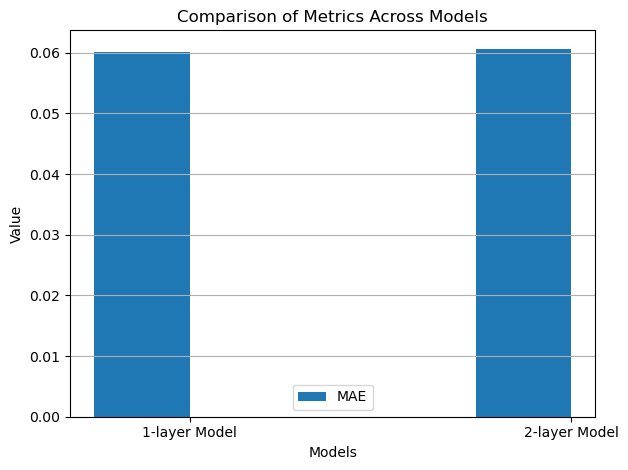

In [53]:
# Cell 4

# Model one
loss_test_p1, mae_test_p1 = model_p1.evaluate(X_test, Y_test, verbose=0)
mse_test_p1 = loss_test_p1

# Cell 4

# Column names
columns = ['1-layer Model', '2-layer Model']  # Removed 'Multilayer Model'

# Values for each metric (e.g., MAE, MSE, R2)
mae = [mae_test_p1, mae_m2]  # Removed mae_m3
# mse = [mse_test_p1, mse_m2]  # Also remove mse_m3 if necessary

# X-axis positions
x = np.arange(len(columns))

# Width of each bar
width = 0.25

# Create grouped bar chart
plt.bar(x - width/2, mae, width, label='MAE')
# plt.bar(x + width/2, mse, width, label='MSE')

# Labels and formatting
plt.xlabel('Models')
plt.ylabel('Value')
plt.title('Comparison of Metrics Across Models')
plt.xticks(x, columns)
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()